In [30]:
f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(5120):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append(int.from_bytes(left, byteorder = 'little' ,signed = True))
  right_lst.append(int.from_bytes(right, byteorder = 'little' ,signed = True))
  pan_lst.append(int.from_bytes(pan, byteorder = 'little' ,signed = True))
  tilt_lst.append(int.from_bytes(tilt, byteorder = 'little' ,signed = True))

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(5120):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append(int.from_bytes(panoff, byteorder = 'little' ,signed = True))
  tiltoff_lst.append(int.from_bytes(tiltoff, byteorder = 'little' ,signed = True))
  rotateoff_lst.append(int.from_bytes(rotateoff, byteorder = 'little' ,signed = True))
  tranoff_lst.append(int.from_bytes(tranoff, byteorder = 'little' ,signed = True))

rotatecom = []
translatecom = []
for i in range(5120):
  rotatecom.append((right_lst[i] - left_lst[i])/2)
  translatecom.append((right_lst[i] + left_lst[i])/2)

In [31]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

In [32]:
size = 5120
datanum = 10
purpose_offset = panoff_lst
purpose_value = pan_lst

In [33]:
input_lst = []
for i in range(size - datanum + 1):
  box = []
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j])
  input_lst.append(box)

label_lst = []
for i in range(datanum - 1, size, 1):
  box = []
  box.append(purpose_value[i])
  label_lst.append(box)


In [34]:
panoff_numpy = np.array(input_lst)
pancom_numpy = np.array(label_lst)

In [35]:
print(panoff_numpy.shape, pancom_numpy.shape)

(5111, 10) (5111, 1)


In [36]:
mean_vals = np.mean(panoff_numpy, axis=0)
std_val = np.std(panoff_numpy)

mean_vals_com = np.mean(pancom_numpy, axis=0)
std_val_com = np.std(pancom_numpy)

In [37]:
panoff_numpy_centered = (panoff_numpy - mean_vals)/std_val
pancom_numpy_centered = (pancom_numpy - mean_vals_com)/std_val_com

# panoff_numpy_centered = (panoff_numpy - np.max(panoff_numpy))/(np.max(panoff_numpy) - np.min(panoff_numpy))
# pancom_numpy_centered = (pancom_numpy - np.max(pancom_numpy))/(np.max(pancom_numpy) - np.min(pancom_numpy))


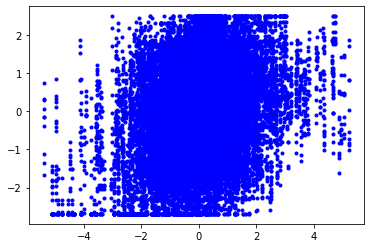

In [38]:
plt.plot(panoff_numpy_centered, pancom_numpy_centered, '.', color = 'b') 


plt.show()

In [39]:
train_x = np.ones((4000, datanum))
train_y = np.ones((4000, 1))
test_x = np.ones((1120 - datanum + 1, datanum))
test_y = np.ones((1120 - datanum + 1, 1))

for i in range(4000):
  train_x[i] = panoff_numpy_centered[i]
  train_y[i] = pancom_numpy_centered[i]

for i in range(4000, 5120 - datanum + 1, 1):
  test_x[i - 4000] = panoff_numpy_centered[i]
  test_y[i - 4000] = pancom_numpy_centered[i]

In [40]:
print(test_x)

[[-0.53149005 -0.3233156   0.71591651 ...  0.12701515 -0.73868178
  -0.28833747]
 [-0.32365447  0.71586229  0.78519504 ... -0.73896643 -0.28837136
  -0.14978042]
 [ 0.71552342  0.78514082 -0.56573623 ... -0.28865601 -0.14981431
  -1.05040126]
 ...
 [-0.04654037 -0.08084076  3.66025389 ... -0.08082043 -0.32301062
  -2.40133253]
 [-0.08117963  3.66019967  0.19632756 ... -0.32329527 -2.40136641
  -1.56999021]
 [ 3.6598608   0.19627334 -0.60037549 ... -2.40165106 -1.5700241
  -0.94648347]]


In [41]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim = train_x.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model.add(
    tf.keras.layers.Dense(
        units=50,    
        input_dim=100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))
model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model.add(
    tf.keras.layers.Dense(
        units=train_y.shape[1],    
        input_dim=100,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation=None))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 3,151
Trainable params: 3,151
Non-trainable params: 0
_________________________________________________________________


In [46]:
sgd_optimizer = tf.keras.optimizers.SGD(
    lr=0.000001, decay=1e-7, momentum=.9)

model.compile(optimizer=adam,
              loss='mse')

NameError: ignored

In [17]:
history = model.fit(train_x, train_y,
                    batch_size=1, epochs=50,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/50
3600/3600 [==============================] - 5s 1ms/step - loss: 1.1315 - val_loss: 1.4655
Epoch 2/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.9701 - val_loss: 1.2894
Epoch 3/50
3600/3600 [==============================] - 7s 2ms/step - loss: 0.8428 - val_loss: 1.1876
Epoch 4/50
3600/3600 [==============================] - 5s 1ms/step - loss: 0.7622 - val_loss: 1.1226
Epoch 5/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.7591 - val_loss: 1.0836
Epoch 6/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.7134 - val_loss: 1.0580
Epoch 7/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.6995 - val_loss: 1.0396
Epoch 8/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.6981 - val_loss: 1.0266
Epoch 9/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.6995 - val_loss: 1.0157
Epoch 10/50
3600/3600 [==============================] - 4s 1ms/step - loss: 0.657

1111/1111 [==============================] - 1s 934us/step - loss: 0.9070
[[-0.20370843]
 [-0.07648177]
 [-0.17670465]
 ...
 [-0.05940206]
 [-0.4879871 ]
 [-0.31895468]]


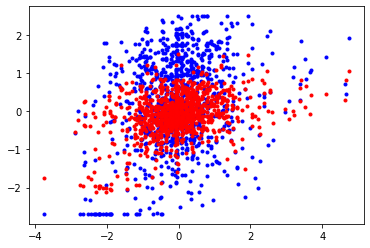

[0.26242648]


In [29]:



loss_and_metrics = model.evaluate(test_x, test_y, batch_size=1)
xhat = test_x
yhat = model.predict(xhat)
print(yhat)


SSE_lst = [] 
SST_lst = []

means = test_y.sum()/test_y.shape[0]

for i in range(xhat.shape[0]):
  SSE_lst.append((test_y[i] - yhat[i])**2)
  SST_lst.append((test_y[i] - means)**2)

R_square = 1 - (sum(SSE_lst) / sum(SST_lst))

# yhat = yhat * std_val_com + mean_vals_com

# print(std_val_com, mean_vals_com)

#important
test_x_plot = np.ones((1120 - datanum + 1, 1))
xhat_plot = np.ones((1120 - datanum + 1, 1))

for i in range(1120 - datanum + 1):
  test_x_plot[i] = test_x[i][datanum - 1]
  xhat_plot[i] = xhat[i][datanum - 1]

plt.plot(test_x_plot, test_y, '.', color = 'b') 
plt.plot(xhat_plot, yhat, '.', color = 'r') 

plt.show()

print(R_square)


In [19]:

print(test_y.shape)
print(yhat.shape)

(1111, 1)
(1111, 1)


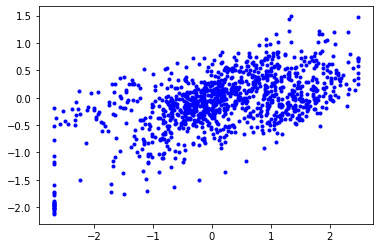

In [20]:
plt.plot(test_y, yhat, '.', color = 'b') 


plt.show()


4000/4000 [==============================] - 3s 818us/step - loss: 0.6134


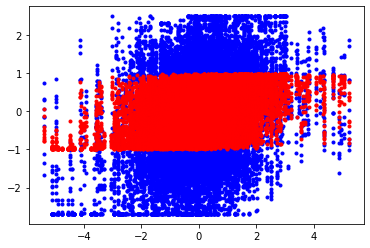

In [ ]:
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=1)
xhat = train_x
yhat = model.predict(xhat)

plt.plot(train_x, train_y, '.', color = 'b') 
plt.plot(xhat, yhat, '.', color = 'r') 
plt.show()